# Stock Market Analysis

**Author:** Kunj Patel

**Date:** July 2, 2024

---

## Introduction

This was originally a project for my DAT 402 class where I explored the relationship between key economic indicators and the stock market, specifically examining how the S&P 500 has responded to changes in GDP, Unemployment Rate, and Interest Rates over time.

However now intend to expand on it:

**Objective**

"Analyzing Stock Market Responses to Economic Indicators Over Time"

And figure out correlation between Stocks and Indicators.

**Project Structure**

- [X] Collect and Prepare Data: Sourcing and cleaning data for the S&P 500 and each economic indicator.

- [X] Exploratory Data Analysis: Conducting preliminary analysis to understand the trends and basic relationships in the data.

- [X] Build Predictive Models: Using machine learning techniques to predict market movements based on economic indicator trends.

- [X] Conclusion: Reflecting on the analysis, its limitations.

## Part 1: Getting the Data and Exploring it.

Links:

Interest Rate Data: [Download Link from FRED](https://fred.stlouisfed.org/graph/oofredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IRLTLT01USM156N&scale=left&cosd=2010-01-01&coed=2024-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-20&revision_date=2024-06-20&nd=1953-04-01)

Unemployment Data: [Download Link from FRED](https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=2010-01-01&coed=2024-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-20&revision_date=2024-06-20&nd=1948-01-01)

GDP Data: [Download Link from FRED](https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=2010-01-01&coed=2024-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-20&revision_date=2024-06-20&nd=1947-01-01)

SMP 500 Stock Data: [Download Link from Yahoo Finance](https://query1.finance.yahoo.com/v7/finance/download/%5ESPX?period1=1276992000&period2=1718841600&interval=1d&events=history&includeAdjustedClose=true)

### Part 1.1: Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_stock_smp = pd.read_csv("../Data/SMP_Trades.csv")

df_gdp = pd.read_csv("../Data/GDP.csv")

df_interest_rates = pd.read_csv("../Data/IRLTLT01USM156N.csv")

df_unemployment_rate = pd.read_csv("../Data/UNRATE.csv")

**S&P 500 Trades Dataset (SMP_Trades.csv)**

| Variable   | Description                                                        |
|------------|--------------------------------------------------------------------|
| Date       | The date of the stock market data, recorded daily.                 |
| Open       | Opening price of the S&P 500 index for the day.                    |
| High       | Highest price of the S&P 500 index during the day.                 |
| Low        | Lowest price of the S&P 500 index during the day.                  |
| Close      | Closing price of the S&P 500 index for the day.                    |
| Adj Close  | Adjusted closing price of the S&P 500 index, accounting for any corporate actions. |
| Volume     | Number of shares traded during the day.                            |


**GDP Dataset (GDP.csv)**

| Variable | Description                                                    |
|----------|----------------------------------------------------------------|
| DATE     | The date when the GDP measurement was taken, recorded quarterly.|
| GDP      | Gross Domestic Product (in billion USD), representing the total economic output. |

**Interest Rates Dataset (IRLTLT01USM156N.csv)**

| Variable         | Description                                            |
|------------------|--------------------------------------------------------|
| DATE             | The date when the interest rate was recorded, recorded monthly. |
| IRLTLT01USM156N  | Long-term interest rates for U.S. Treasury bonds (in %). |

**Unemployment Rate Dataset (UNRATE.csv)**

| Variable | Description                                                            |
|----------|------------------------------------------------------------------------|
| DATE     | The date when the unemployment rate was recorded, recorded monthly.    |
| UNRATE   | Unemployment rate (in %), representing the percentage of the labor force that is jobless and seeking employment. |


### Part 1.2: Plotting the Data

In [3]:
df_stock_smp['Date'] = pd.to_datetime(df_stock_smp['Date'])
df_gdp['DATE'] = pd.to_datetime(df_gdp['DATE'])
df_interest_rates['DATE'] = pd.to_datetime(df_interest_rates['DATE'])
df_unemployment_rate['DATE'] = pd.to_datetime(df_unemployment_rate['DATE'])

df_stock_smp.set_index('Date', inplace=True)
df_gdp.set_index('DATE', inplace=True)
df_interest_rates.set_index('DATE', inplace=True)
df_unemployment_rate.set_index('DATE', inplace=True)

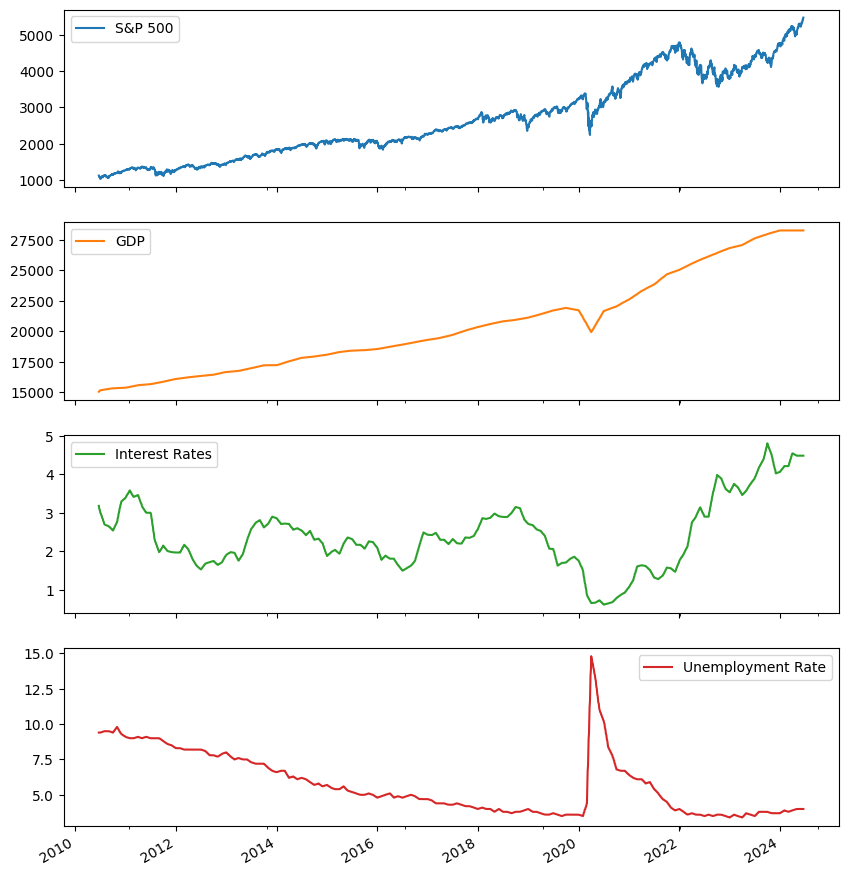

In [4]:
data = pd.DataFrame({
    'S&P 500': df_stock_smp['Adj Close'],
    'GDP': df_gdp['GDP'],
    'Interest Rates': df_interest_rates['IRLTLT01USM156N'],
    'Unemployment Rate': df_unemployment_rate['UNRATE']
})

data['GDP'] = data['GDP'].interpolate(method='linear')
data['Interest Rates'] = data['Interest Rates'].interpolate(method='linear')
data['Unemployment Rate'] = data['Unemployment Rate'].interpolate(method='linear')

data['S&P 500'] = data['S&P 500'].fillna(method='ffill')

data = data.dropna(subset=['S&P 500'])

data.plot(subplots=True, figsize=(10, 12))
plt.show()

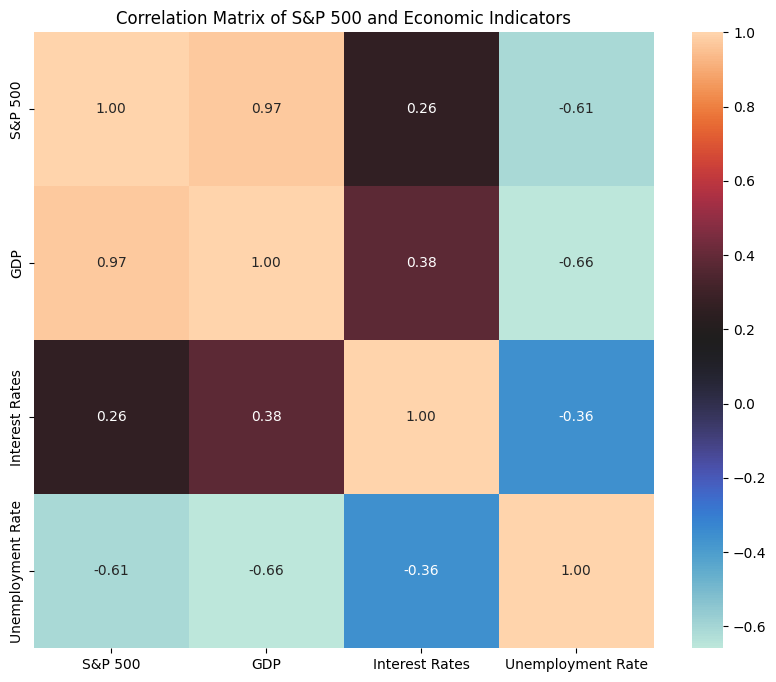

In [5]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='icefire')
plt.title('Correlation Matrix of S&P 500 and Economic Indicators')
plt.show()

- As GDP grows, the S&P 500 generally increases, which aligns with economic theory that a growing economy often boosts corporate earnings and investor sentiment, so this makes sense.

- Generally, a higher unemployment rate is associated with poorer economic conditions, so this also aligns.

- Higher interest rates might be used to control economic overheating and inflation, potentially slowing GDP growth, which checks out.

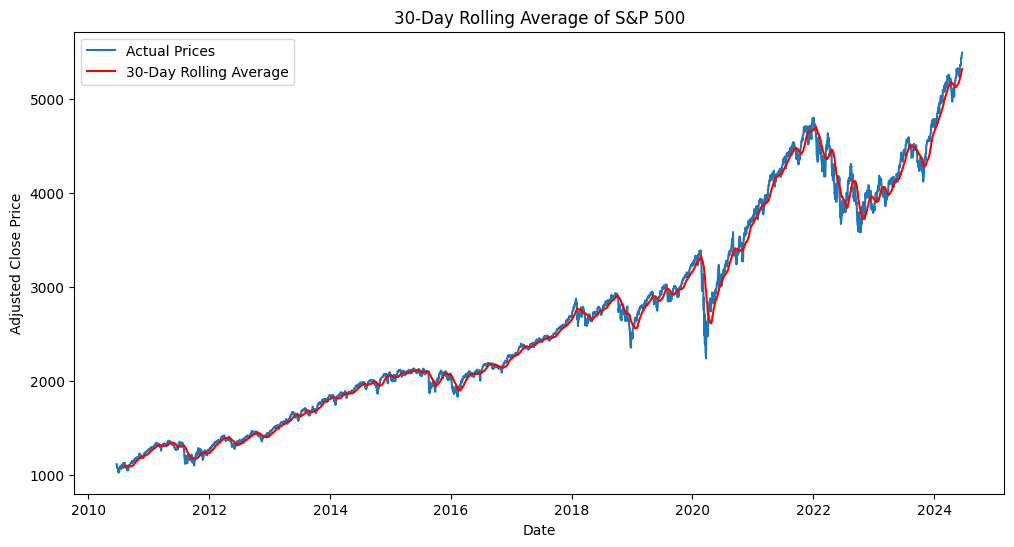

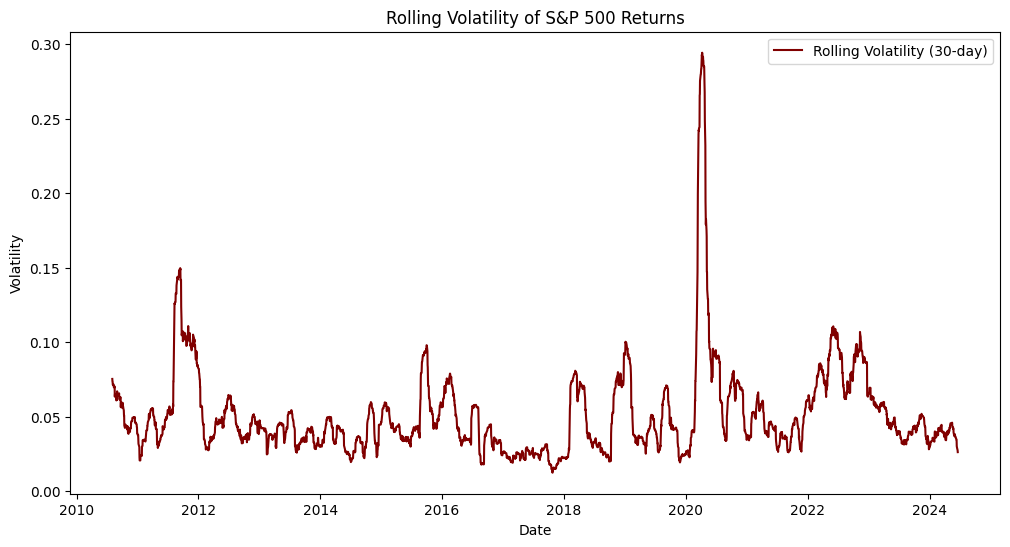

In [6]:
rolling_avg = df_stock_smp['Adj Close'].rolling(window=30).mean()

df_stock_smp['daily_returns'] = df_stock_smp['Adj Close'].pct_change()

volatility = df_stock_smp['daily_returns'].rolling(window=30).std() * np.sqrt(30)

plt.figure(figsize=(12, 6))
plt.plot(df_stock_smp['Adj Close'], label='Actual Prices')
plt.plot(rolling_avg, label='30-Day Rolling Average', color='red')
plt.title('30-Day Rolling Average of S&P 500')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(volatility, label='Rolling Volatility (30-day)', color='Maroon')
plt.title('Rolling Volatility of S&P 500 Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

## Part 2: Modelling and Problem Statements

Sub-Problems Identified:

**Relationship Between Unemployment Rates and Interest Rates vs Stock Market Performance:** Is there a significant inverse relationship between unemployment rates and Interest Rates vs the S&P 500?

**Forecasting S&P 500 Performance Using Economic Indicators:** Can a combination of GDP, unemployment rates, and interest rates be used to effectively forecast future values of the S&P 500?

In [7]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit

### Part 2.1: Relationship Between Unemployment Rates and Stock Market Performance:

Is there a significant inverse relationship between unemployment rates and the S&P 500, and how can this relationship be used to predict stock market downturns?

**Using OLS**

Ordinary Least Squares is a method used to estimate the parameters in a linear regression model. The goal of OLS is to find the line of best fit

Model:

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

Here, $\beta_0$ and $\beta_1$ are parameters we need to estimate.

To find the optimal parameters $\beta_0$ and $\beta_1$.

The final least square estimates looks like:

$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2}$

$\hat{\beta}_0 = \overline{y} - \hat{\beta}_1 \overline{x}$

where $\overline{x}$ and $\overline{y}$ are the sample means of $x$ and $y$ technique in linear regression.

In [8]:
X = data[['Unemployment Rate', 'Interest Rates']]
y = data['S&P 500']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(model.summary())
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

def acc(y_true, y_pred, threshold=0.05):
    return np.mean(np.abs((y_true - y_pred) / y_true) < threshold)

accuracy = acc(y_test, y_pred)

print(f'Accuracy: {accuracy}')

predictions = model.predict(sm.add_constant(data[['Unemployment Rate', 'Interest Rates']]))
actual = data['S&P 500']
residuals = actual - predictions

coef = model.params
errors = model.bse

# plt.figure(figsize=(8, 5))
# coef.plot(kind='bar', yerr=[errors, errors], error_kw=dict(capsize=5, capthick=2, ecolor='red'))
# plt.title('Coefficient Estimates and Their Errors')
# plt.ylabel('Coefficient Value')
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                S&P 500   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     859.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          6.26e-293
Time:                        08:48:23   Log-Likelihood:                -23515.
No. Observations:                2863   AIC:                         4.704e+04
Df Residuals:                    2860   BIC:                         4.705e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4268.4736     82.06

**Using Ridge Regression**

In [9]:
X = data[['Unemployment Rate', 'Interest Rates']]
y = data['S&P 500']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 800583.6813431801
R^2 Score: 0.37668694357300037


**Using PLS Regression**

Partial Least Squares (PLS) is a method used for predictive modeling and dimensionality reduction in cases with highly collinear data or when the predictors are numerous.

In PLS, the relationship between the predictors $\mathbf{X}$ (a matrix of size $\mathbf{n}$ $\times$ $\mathbf{p}$)

$\mathbf{y} = \mathbf{T}\mathbf{Q}^T + \mathbf{E}$
$\mathbf{X} = \mathbf{T}\mathbf{P}^T + \mathbf{F}$

To find the optimal latent structures and coefficients:

1. **Maximize Covariance**: Find weights $\mathbf{w}$ for $\mathbf{X}$ that maximize the covariance between the projected scores $\mathbf{X}$ and $\mathbf{y}$.

2. **Calculate Scores and Loadings**: Compute the scores $\mathbf{t} = \mathbf{Xw}$, and use these scores to find the loadings $\mathbf{p}$ for $\mathbf{X}$ and $\mathbf{q}$ or $\mathbf{y}$

3. **Deflation**: Update $\mathbf{X}$ and $\mathbf{y}$ by removing the estimated parts associated with $\mathbf{t}$ preparing them for the next round of extraction, thus reducing their dimensions.

$\mathbf{B} = (\mathbf{P}^T(\mathbf{X}^T\mathbf{X})\mathbf{P})^{-1}\mathbf{P}^T(\mathbf{X}^T\mathbf{y})$



In [10]:
X = data[['Unemployment Rate', 'Interest Rates']]
y = data['S&P 500']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

y_pred = pls.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 800587.0643906667
R^2 Score: 0.376684309622649


The regression model described in the scenario yields a significant inverse association between unemployment rates and the S&P 500 stock index. Specifically, the regression findings suggest that for increase in the unemployment rate, the S&P 500 index is predicted to fall, provided all other variables stay constant. This inverse link is confirmed by a significantly negative unemployment rate coefficient with a very low p-value, indicating statistical significance.

The model has an R-squared value of 0.375, indicating that variations in the unemployment rate and interest rates may explain approximately 37.5% of the variability in the S&P 500. While this shows a decent fit, there is still of space for improvement, either by adding more variables or using alternative modeling methodologies.

In terms of practical application, this connection may be utilized to forecast stock market declines by tracking rises in the unemployment rate. If unemployment starts to grow, it may serve as an early warning of probable stock market falls.